In [190]:
!pip install tensorflow flask scikit-learn pandas numpy flask-ngrok
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [191]:
import numpy as np
import pandas as pd

In [192]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [193]:

import os

file_path = "/content/drive/MyDrive/spam.csv"

if os.path.exists(file_path):
    print("✅ الملف موجود:", file_path)
else:
    print("❌ الملف مش موجود، شيكي على المسار.")


✅ الملف موجود: /content/drive/MyDrive/spam.csv


In [194]:
import pandas as pd

df = pd.read_csv(file_path, encoding='latin-1')  # بعض نسخ الداتا بتحتاج latin-1
print("✅ Data loaded successfully! Shape:", df.shape)
df.head()


✅ Data loaded successfully! Shape: (5572, 5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [195]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
852,ham,"I am real, baby! I want to bring out your inne...",NaN,NaN,NaN
2915,spam,Sorry! U can not unsubscribe yet. THE MOB offe...,NaN,NaN,NaN
283,ham,Ok. I asked for money how far,NaN,NaN,NaN
2632,spam,"URGENT! Your mobile No 077xxx WON a ÃÂ£2,000 ...",NaN,NaN,NaN
529,spam,You will recieve your tone within the next 24h...,NaN,NaN,NaN


In [196]:
df.shape

(5572, 5)

In [197]:
# 1. Data cleaning
# 2. EDA
# 3. Text Preprocessing
# 4. Model building
# 5. Evaluation
# 6. Improvement
# 7. Website
# 8. Deploy

## 1. Data Cleaning

In [198]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v1          5572 non-null   object 
 1   v2          5572 non-null   object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 217.8+ KB


In [199]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [200]:
df.sample(5)

,v1,v2
3783,ham,How r ÃÂ¼ going to send it to me?
3246,ham,"Its ok, if anybody asks abt me, u tel them..:-P"
198,ham,is your hamster dead? Hey so tmr i meet you at...
2848,spam,Free-message: Jamster!Get the crazy frog sound...
3059,spam,You are now unsubscribed all services. Get ton...


In [201]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5408,ham,... Are you in the pub?
4950,ham,I am in bus on the way to calicut
921,ham,When u wana see it then
2457,ham,Onum ela pa. Normal than.
1124,ham,Good morning princess! How are you?


In [202]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [203]:
df['target'] = encoder.fit_transform(df['target'])

In [204]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [205]:
# missing values
df.isnull().sum()

,0
target,0
text,0


In [206]:

# check for duplicate values
df.duplicated().sum()

np.int64(415)

In [207]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [208]:
df.duplicated().sum()

np.int64(0)

In [209]:
df.shape

(5157, 2)

## 2.EDA

In [210]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [211]:
df['target'].value_counts()

,count
target,
0,4516
1,641


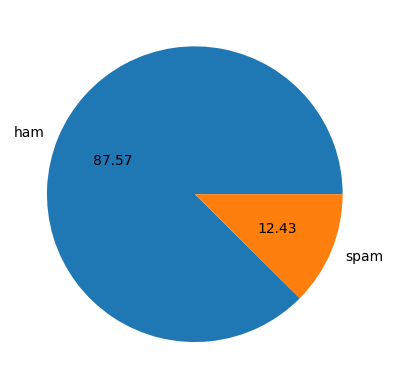

In [212]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [213]:

# Data is imbalanced

In [214]:
import nltk

In [215]:

!pip install nltk

In [216]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [217]:
df['num_characters'] = df['text'].apply(len)

In [218]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [219]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [220]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [221]:

df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [222]:

df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [223]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.462478,18.544890,1.969750
std,58.592957,13.401415,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [224]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,71.099424,17.250664,1.827724
std,56.774474,13.581714,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [225]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,138.382215,27.663027,2.970359
std,30.790404,7.104050,1.485575
min,7.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,158.000000,32.000000,4.000000
max,226.000000,46.000000,9.000000


In [226]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

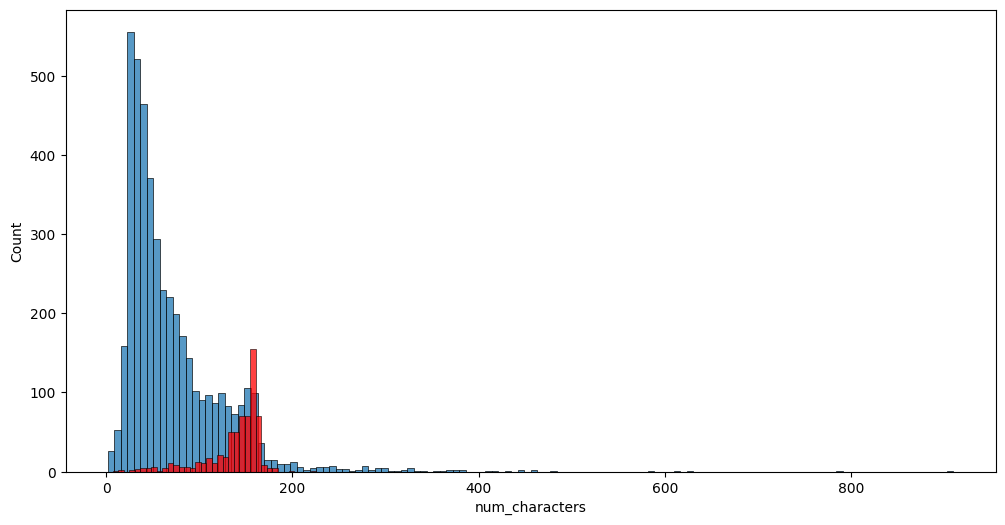

In [227]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

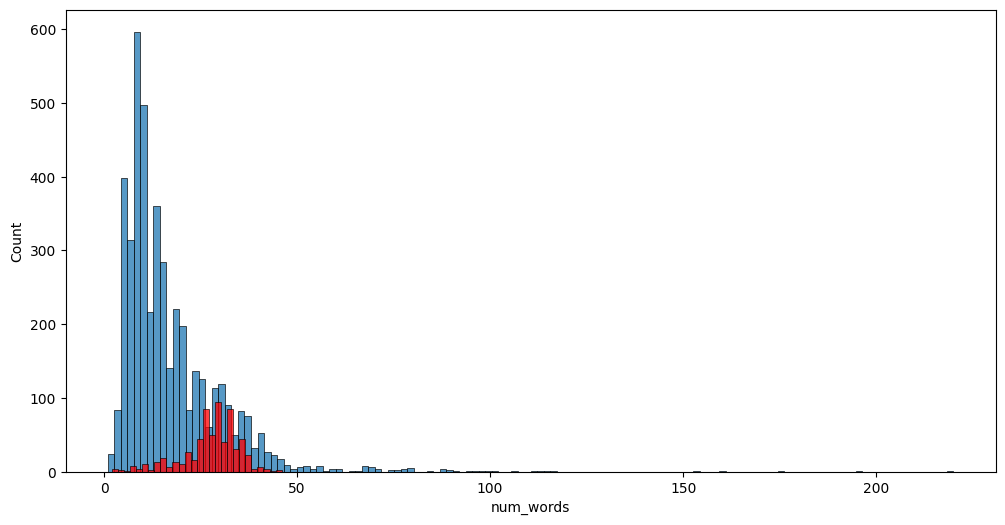

In [228]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

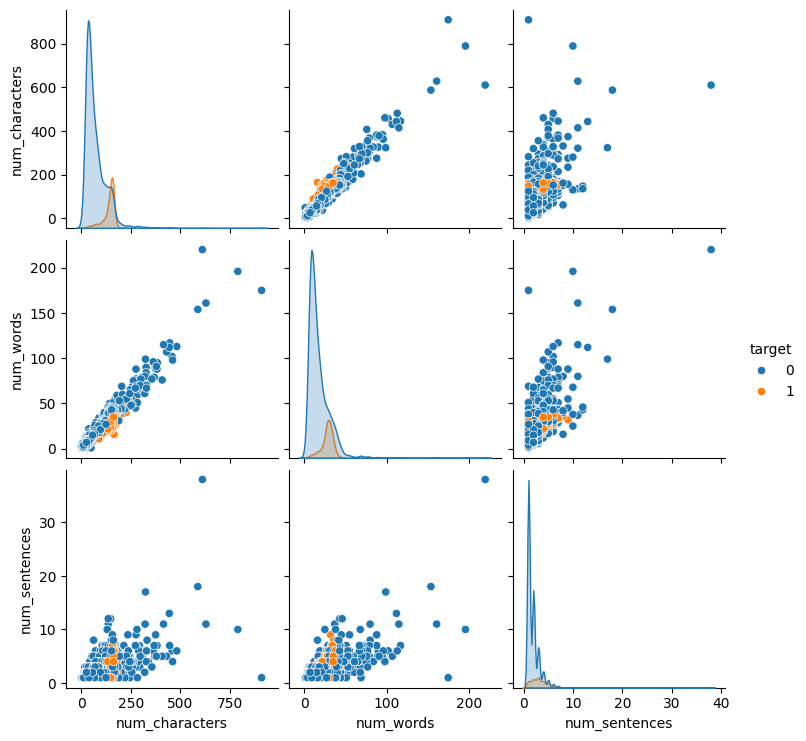

In [229]:

sns.pairplot(df,hue='target')

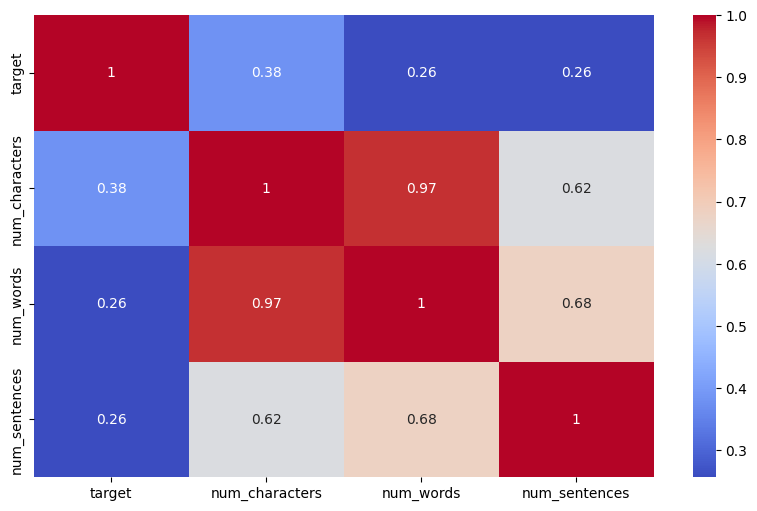

In [230]:

import seaborn as sns
import matplotlib.pyplot as plt

# نخلي الهيتماب تشتغل على الأعمدة الرقمية بس
numeric_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.show()


## 3. Data Preprocessing
- Lower case
- Tokenization
- Removing special characters
- Removing stop words and punctuation
- Stemming

In [231]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)

In [232]:
# 📌 تحميل المكتبات المطلوبة
import nltk
import string
from nltk.corpus import stopwords

# تحميل الموارد اللي بيستخدمها NLTK
nltk.download('punkt')
nltk.download('stopwords')

# 📌 دالة الـ preprocessing
def transform_text(text):
    # تحويل الحروف لصغيرة
    text = text.lower()
    # تقسيم النص لكلمات
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        # استبعاد stopwords وعلامات الترقيم
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    return " ".join(y)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [233]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")

"'m gon na home soon n't want talk stuff anymore tonight k 've cried enough today"

In [234]:
df['text'][10]

"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

In [235]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [236]:
df['transformed_text'] = df['text'].apply(transform_text)

In [237]:

df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [238]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [239]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

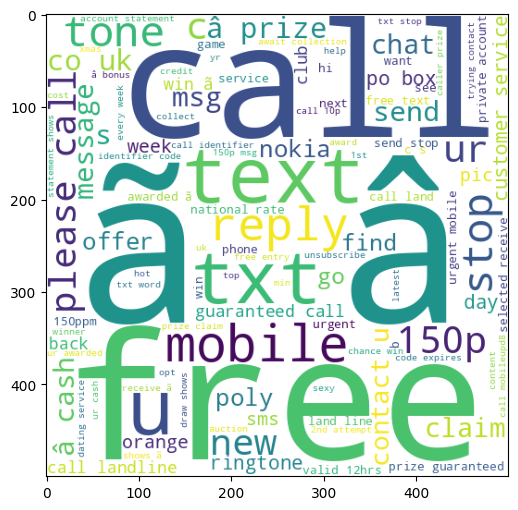

In [240]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [241]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

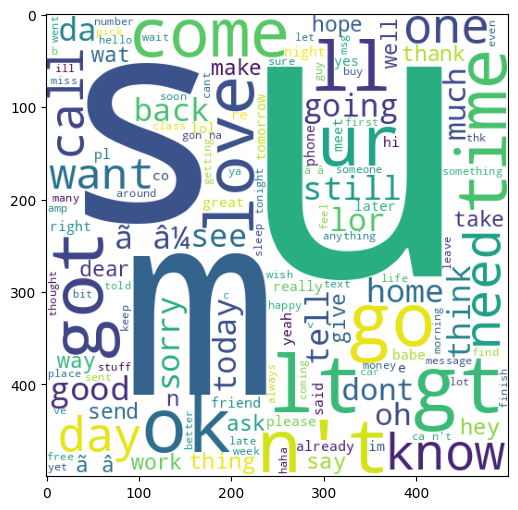

In [242]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [243]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [244]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [245]:
len(spam_corpus)

10880

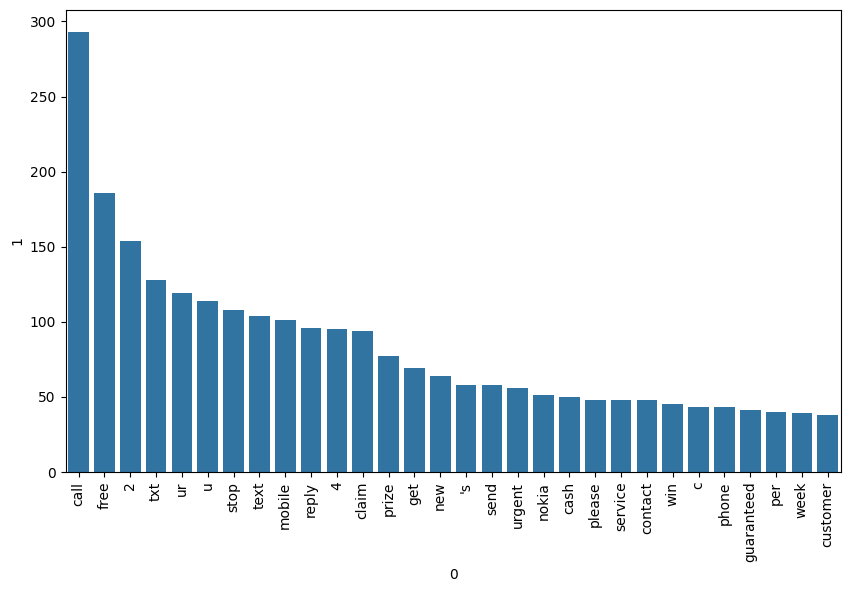

In [246]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


most_common_df = pd.DataFrame(Counter(spam_corpus).most_common(30))

plt.figure(figsize=(10,6))
sns.barplot(x=most_common_df[0], y=most_common_df[1])
plt.xticks(rotation='vertical')
plt.show()


In [247]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [248]:
len(ham_corpus)

40207

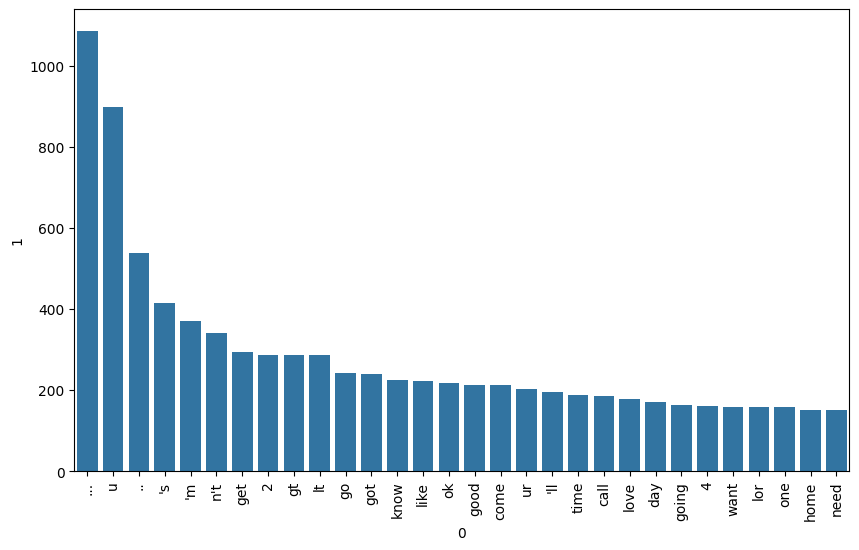

In [249]:
from collections import Counter
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# استخراج أكتر 30 كلمة مستخدمة في ham_corpus
most_common_ham = pd.DataFrame(Counter(ham_corpus).most_common(30))

plt.figure(figsize=(10,6))
sns.barplot(x=most_common_ham[0], y=most_common_ham[1])
plt.xticks(rotation='vertical')
plt.show()


In [250]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


## 4. Model Building

In [251]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [252]:

X = tfidf.fit_transform(df['transformed_text']).toarray()

In [253]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [254]:
# appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [255]:
X.shape

(5157, 3000)

In [256]:
y = df['target'].values

In [257]:
from sklearn.model_selection import train_test_split

In [258]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [259]:

from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [260]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [261]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8866279069767442
[[800 105]
 [ 12 115]]
0.5227272727272727


In [262]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9806201550387597
[[905   0]
 [ 20 107]]
1.0


In [263]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9854651162790697
[[904   1]
 [ 14 113]]
0.9912280701754386


In [264]:
# tfidf --> MNB

In [265]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [266]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [267]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [268]:

def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [269]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9815891472868217, 0.990909090909091)

In [270]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9815891472868217
Precision -  0.990909090909091
For  KN
Accuracy -  0.9118217054263565
Precision -  1.0
For  NB
Accuracy -  0.9806201550387597
Precision -  1.0
For  DT
Accuracy -  0.9476744186046512
Precision -  0.8613861386138614
For  LR
Accuracy -  0.9554263565891473
Precision -  0.9655172413793104
For  RF
Accuracy -  0.9777131782945736
Precision -  1.0
For  AdaBoost
Accuracy -  0.936046511627907
Precision -  0.8961038961038961
For  BgC
Accuracy -  0.9612403100775194
Precision -  0.9065420560747663
For  ETC
Accuracy -  0.9825581395348837
Precision -  0.990990990990991
For  GBDT
Accuracy -  0.9573643410852714
Precision -  0.946236559139785
For  xgb
Accuracy -  0.9748062015503876
Precision -  0.954954954954955


In [271]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [272]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.911822,1.000000
2,NB,0.980620,1.000000
5,RF,0.977713,1.000000
8,ETC,0.982558,0.990991
0,SVC,0.981589,0.990909
4,LR,0.955426,0.965517
10,xgb,0.974806,0.954955
9,GBDT,0.957364,0.946237
7,BgC,0.961240,0.906542
6,AdaBoost,0.936047,0.896104


In [273]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [274]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.911822
1,NB,Accuracy,0.980620
2,RF,Accuracy,0.977713
3,ETC,Accuracy,0.982558
4,SVC,Accuracy,0.981589
5,LR,Accuracy,0.955426
6,xgb,Accuracy,0.974806
7,GBDT,Accuracy,0.957364
8,BgC,Accuracy,0.961240
9,AdaBoost,Accuracy,0.936047


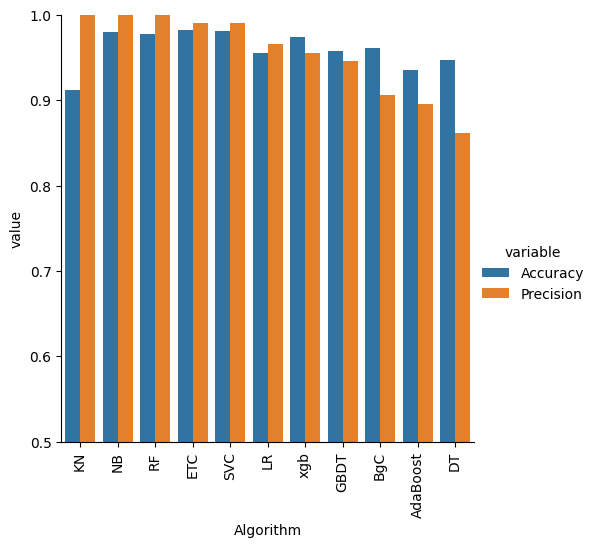

In [275]:

sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [276]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [277]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [278]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [279]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [280]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [281]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [282]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.911822,1.000000,0.911822,1.000000,0.911822,1.000000,0.911822,1.000000
1,NB,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000,0.980620,1.000000
2,RF,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000,0.977713,1.000000
3,ETC,0.982558,0.990991,0.982558,0.990991,0.982558,0.990991,0.982558,0.990991
4,SVC,0.981589,0.990909,0.981589,0.990909,0.981589,0.990909,0.981589,0.990909
5,LR,0.955426,0.965517,0.955426,0.965517,0.955426,0.965517,0.955426,0.965517
6,xgb,0.974806,0.954955,0.974806,0.954955,0.974806,0.954955,0.974806,0.954955
7,GBDT,0.957364,0.946237,0.957364,0.946237,0.957364,0.946237,0.957364,0.946237
8,BgC,0.961240,0.906542,0.961240,0.906542,0.961240,0.906542,0.961240,0.906542
9,AdaBoost,0.936047,0.896104,0.936047,0.896104,0.936047,0.896104,0.936047,0.896104


In [283]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [284]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [285]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [286]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9854651162790697
Precision 1.0


In [287]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [288]:
from sklearn.ensemble import StackingClassifier

In [289]:

clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [291]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9874031007751938
Precision 0.9830508474576272


In [293]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [294]:
import joblib

# ناخد نسخة من المتغيرات
all_vars = dict(globals())

# ندور على أول متغير يكون موديل sklearn
model_found = None
for name, obj in all_vars.items():
    if "sklearn" in str(type(obj)):   # أي object من scikit-learn
        model_found = obj
        print(f"✅ Found model: {name} ({type(obj)})")
        break

if model_found is None:
    print("⚠️ مفيش موديل sklearn متدرب لسه. لازم تدربي الموديل الأول.")
else:
    joblib.dump(model_found, "sms_spam_pipeline.pkl")
    print("💾 Model saved successfully as sms_spam_pipeline.pkl")


✅ Found model: _ (<class 'sklearn.ensemble._voting.VotingClassifier'>)
💾 Model saved successfully as sms_spam_pipeline.pkl


In [295]:
from google.colab import files
files.download("sms_spam_pipeline.pkl")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [296]:
print(df.columns)
df.head()


Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences',
       'transformed_text'],
      dtype='object')


,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazy .. available bugis n gre...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joking wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entry 2 wkly comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say early hor ... u c already say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goes usf lives around though


In [297]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# تحميل الموارد لو مش موجودة
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def advanced_preprocess(text):
    # 1) lowercase
    text = text.lower()

    # 2) إزالة الروابط (URLs)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)

    # 3) إزالة الإيميلات
    text = re.sub(r'\S+@\S+', '', text)

    # 4) إزالة الأرقام
    text = re.sub(r'\d+', '', text)

    # 5) إزالة الإيموجي والرموز الغريبة
    text = re.sub(r'[^\w\s]', '', text)

    # 6) تقسيم النص لكلمات
    tokens = text.split()

    # 7) إزالة stopwords + Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return " ".join(tokens)

# -------------------------
# تطبيق الـ preprocessing
# -------------------------
df['clean_text'] = df['text'].apply(advanced_preprocess)

print("✅ Preprocessing applied successfully!")
df[['text', 'clean_text']].head(10)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


✅ Preprocessing applied successfully!


,text,clean_text
0,"Go until jurong point, crazy.. Available only ...",go jurong point crazy available bugis n great ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry wkly comp win fa cup final tkts st ...
3,U dun say so early hor... U c already then say...,u dun say early hor u c already say
4,"Nah I don't think he goes to usf, he lives aro...",nah dont think go usf life around though
5,FreeMsg Hey there darling it's been 3 week's n...,freemsg hey darling week word back id like fun...
6,Even my brother is not like to speak with me. ...,even brother like speak treat like aid patent
7,As per your request 'Melle Melle (Oru Minnamin...,per request melle melle oru minnaminunginte nu...
8,WINNER!! As a valued network customer you have...,winner valued network customer selected receiv...
9,Had your mobile 11 months or more? U R entitle...,mobile month u r entitled update latest colour...


In [298]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# تقسيم الداتا
X = df['clean_text']   # النصوص بعد التنضيف
y = df['target']       # 0 = ham, 1 = spam

# تحويل النصوص لـ أرقام
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2), stop_words='english')
X_tfidf = tfidf.fit_transform(X)

# تطبيق SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_tfidf, y)

print("قبل SMOTE:", X_tfidf.shape, "Ham/Spam:", y.value_counts().to_dict())
print("بعد SMOTE:", X_res.shape, "Ham/Spam:", dict(pd.Series(y_res).value_counts()))


قبل SMOTE: (5157, 5000) Ham/Spam: {0: 4516, 1: 641}
بعد SMOTE: (9032, 5000) Ham/Spam: {0: np.int64(4516), 1: np.int64(4516)}


/tmp/ipython-input-3124228896.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="Set2")


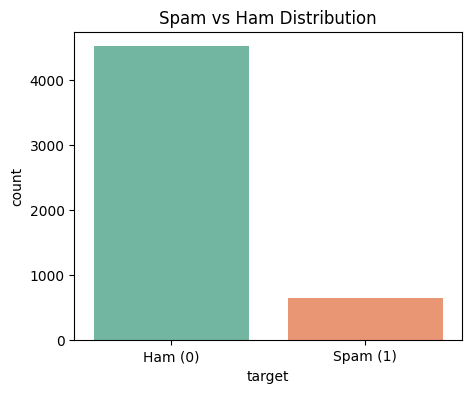

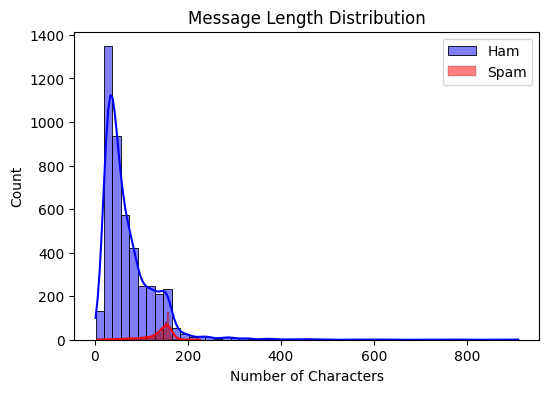

/tmp/ipython-input-3124228896.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[w[1] for w in spam_common], y=[w[0] for w in spam_common], palette="Reds_r")


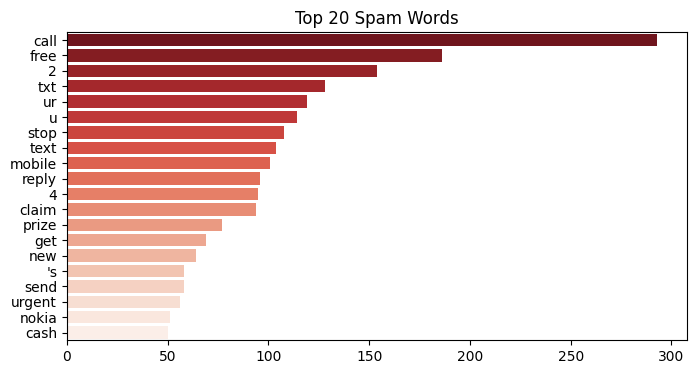

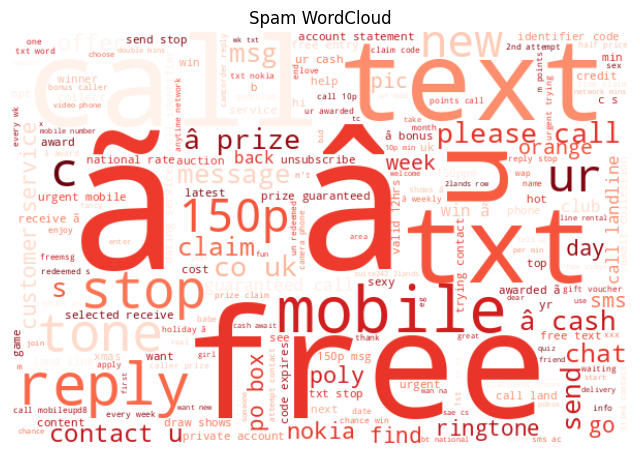

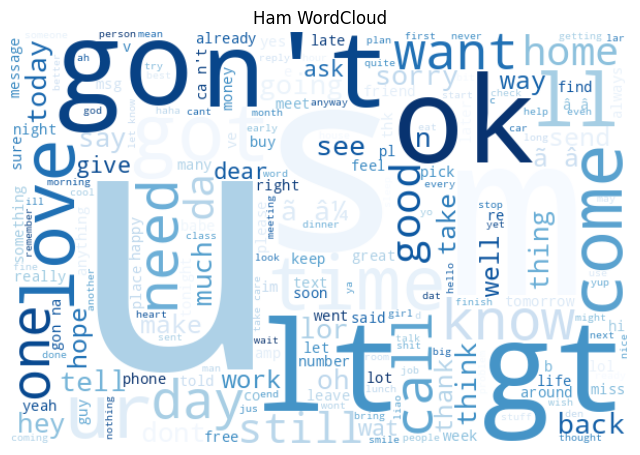

In [299]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1️⃣ Spam vs Ham Distribution
plt.figure(figsize=(5,4))
sns.countplot(x="target", data=df, palette="Set2")
plt.title("Spam vs Ham Distribution")
plt.xticks([0,1], ["Ham (0)", "Spam (1)"])
plt.show()

# 2️⃣ Message Length Distribution
plt.figure(figsize=(6,4))
sns.histplot(df[df['target']==0]['num_characters'], bins=50, color="blue", label="Ham", kde=True)
sns.histplot(df[df['target']==1]['num_characters'], bins=50, color="red", label="Spam", kde=True)
plt.legend()
plt.title("Message Length Distribution")
plt.xlabel("Number of Characters")
plt.show()

# 3️⃣ Most Common Words (Spam)
from collections import Counter
spam_words = " ".join(df[df['target']==1]['transformed_text']).split()
spam_common = Counter(spam_words).most_common(20)

plt.figure(figsize=(8,4))
sns.barplot(x=[w[1] for w in spam_common], y=[w[0] for w in spam_common], palette="Reds_r")
plt.title("Top 20 Spam Words")
plt.show()

# 4️⃣ WordCloud for Spam
spam_text = " ".join(df[df['target']==1]['transformed_text'])
wc_spam = WordCloud(width=600, height=400, background_color="white", colormap="Reds").generate(spam_text)

plt.figure(figsize=(8,6))
plt.imshow(wc_spam, interpolation="bilinear")
plt.axis("off")
plt.title("Spam WordCloud")
plt.show()

# 5️⃣ WordCloud for Ham
ham_text = " ".join(df[df['target']==0]['transformed_text'])
wc_ham = WordCloud(width=600, height=400, background_color="white", colormap="Blues").generate(ham_text)

plt.figure(figsize=(8,6))
plt.imshow(wc_ham, interpolation="bilinear")
plt.axis("off")
plt.title("Ham WordCloud")
plt.show()


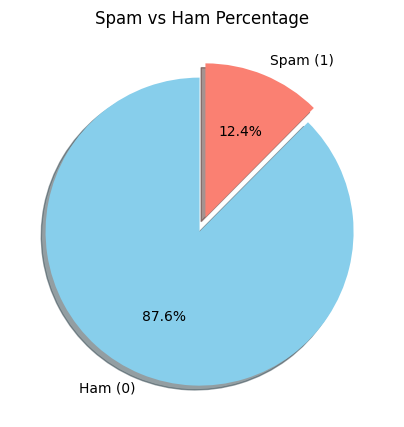

In [300]:
# 📊 Pie Chart Spam vs Ham
plt.figure(figsize=(5,5))
labels = ["Ham (0)", "Spam (1)"]
sizes = df['target'].value_counts().values
colors = ["skyblue", "salmon"]
explode = (0.05, 0.05)  # نفصل الشرائح شوية

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, explode=explode, shadow=True)
plt.title("Spam vs Ham Percentage")
plt.show()


In [301]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# 🎯 تقسيم البيانات
X = df['transformed_text']   # النصوص بعد الـ preprocessing
y = df['target']             # الهدف (0=Ham, 1=Spam)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 🔤 تحويل النصوص لـ TF-IDF
tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


model = MultinomialNB()
model.fit(X_train_tfidf, y_train)


y_pred = model.predict(X_test_tfidf)


acc = accuracy_score(y_test, y_pred)
print("✅ Model Accuracy:", round(acc*100, 2), "%")


print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))


✅ Model Accuracy: 97.67 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       896
           1       1.00      0.82      0.90       136

    accuracy                           0.98      1032
   macro avg       0.99      0.91      0.95      1032
weighted avg       0.98      0.98      0.98      1032



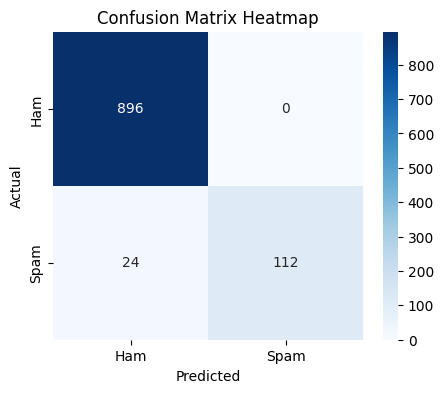

In [302]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 🔎 مصفوفة الالتباس
cm = confusion_matrix(y_test, y_pred)

# 🎨 رسم Heatmap
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap")
plt.show()


✅ قبل SMOTE: {0: 3612, 1: 513}
✅ بعد SMOTE: {0: 3612, 1: 3612}

✅ Accuracy: 97.67 %

📊 Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       904
           1       0.93      0.88      0.90       128

    accuracy                           0.98      1032
   macro avg       0.95      0.94      0.95      1032
weighted avg       0.98      0.98      0.98      1032



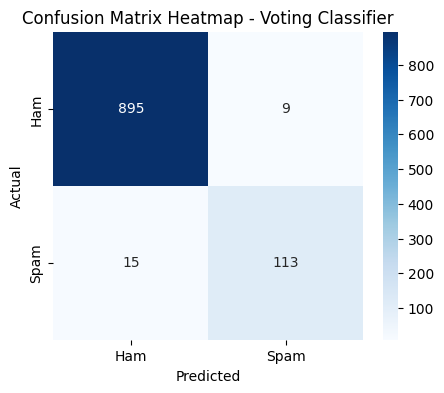

In [303]:
# ===============================
# 📦 الاستيراد
# ===============================
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ===============================
# 🎯 تقسيم البيانات
# ===============================
X = df['transformed_text']
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ===============================
# 🔤 TF-IDF مع N-grams
# ===============================
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# ===============================
# ⚖️ معالجة Class Imbalance باستخدام SMOTE
# ===============================
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_tfidf, y_train)

print("✅ قبل SMOTE:", y_train.value_counts().to_dict())
print("✅ بعد SMOTE:", y_resampled.value_counts().to_dict())

# ===============================
# 🏆 Voting Classifier (NB + SVM + RF)
# ===============================
clf1 = MultinomialNB()
clf2 = LinearSVC(class_weight="balanced", random_state=42)
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('nb', clf1), ('svm', clf2), ('rf', clf3)],
    voting='hard'
)

# تدريب
voting_clf.fit(X_resampled, y_resampled)

# ===============================
# 📊 التقييم
# ===============================
y_pred = voting_clf.predict(X_test_tfidf)

print("\n✅ Accuracy:", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))

# ===============================
# 🎨 Confusion Matrix Heatmap
# ===============================
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
            xticklabels=["Ham", "Spam"],
            yticklabels=["Ham", "Spam"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix Heatmap - Voting Classifier")
plt.show()


In [304]:

# -----------------------
# 2. ترميز target
# -----------------------
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])  # ham=0, spam=1

# -----------------------
# 3. تقسيم البيانات
# -----------------------
X = df['text'].values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -----------------------
# 4. Tokenization + Padding
# -----------------------
max_words = 5000   # عدد الكلمات الأكثر شيوعًا
max_len = 100      # الطول الأقصى للجملة بعد البادينج

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# -----------------------
# 5. بناء نموذج LSTM
# -----------------------
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(64, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # output: 0 أو 1
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# -----------------------
# 6. تدريب النموذج
# -----------------------
history = model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# -----------------------
# 7. تقييم النموذج
# -----------------------
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


65/65 ━━━━━━━━━━━━━━━━━━━━ 16s 177ms/step - accuracy: 0.8538 - loss: 0.4881 - val_accuracy: 0.8682 - val_loss: 0.3907
Epoch 2/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 12s 181ms/step - accuracy: 0.8778 - loss: 0.4096 - val_accuracy: 0.8682 - val_loss: 0.3918
Epoch 3/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 164ms/step - accuracy: 0.8778 - loss: 0.3991 - val_accuracy: 0.8682 - val_loss: 0.3911
Epoch 4/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 182ms/step - accuracy: 0.8745 - loss: 0.4061 - val_accuracy: 0.8682 - val_loss: 0.3914
Epoch 5/5
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 155ms/step - accuracy: 0.8763 - loss: 0.4012 - val_accuracy: 0.8682 - val_loss: 0.3908
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.8585 - loss: 0.4091
Test Accuracy: 86.82%


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_8 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 35s 312ms/step - accuracy: 0.8644 - loss: 0.4038 - val_accuracy: 0.9767 - val_loss: 0.0850
Epoch 2/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 336ms/step - accuracy: 0.9872 - loss: 0.0463 - val_accuracy: 0.9893 - val_loss: 0.0395
Epoch 3/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 20s 304ms/step - accuracy: 0.9917 - loss: 0.0290 - val_accuracy: 0.9874 - val_loss: 0.0480
Epoch 4/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 19s 300ms/step - accuracy: 0.9973 - loss: 0.0125 - val_accuracy: 0.9874 - val_loss: 0.0510
Epoch 5/10
65/65 ━━━━━━━━━━━━━━━━━━━━ 22s 340ms/step - accuracy: 0.9995 - loss: 0.0045 - val_accuracy: 0.9893 - val_loss: 0.0543
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.9870 - loss: 0.0418
Test Accuracy: 98.93%


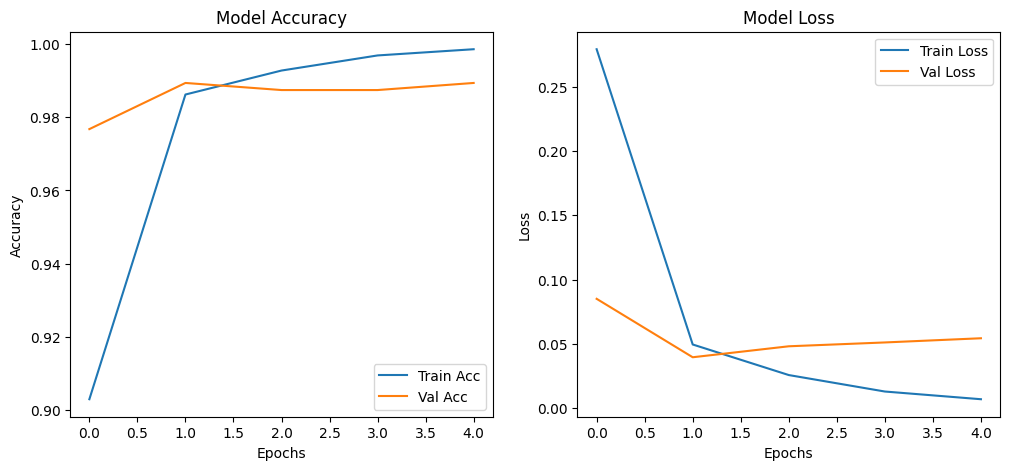

In [308]:
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

# -----------------------
# 1. Tokenization + Padding (كما هو)
# -----------------------
max_words = 5000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# -----------------------
# 2. بناء نموذج Bidirectional LSTM
# -----------------------
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    tf.keras.layers.Bidirectional(LSTM(64)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

# -----------------------
# 3. Early Stopping
# -----------------------
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# -----------------------
# 4. تدريب النموذج
# -----------------------
history = model.fit(
    X_train_pad, y_train,
    epochs=10,  # زيادة عدد الـ epochs
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    callbacks=[early_stop],
    verbose=1
)

# -----------------------
# 5. تقييم النموذج
# -----------------------
loss, acc = model.evaluate(X_test_pad, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

# -----------------------
# 6. رسم Training & Validation Accuracy & Loss
# -----------------------
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()
